#### Activity 3 - Logistic Regression Practice (Iris Data Set and Heart Attack)

Basic Classification Algorithm - Binary Logistic Regression

We would need to practice using a few datasets to understand how logistic regression works. 

##### Part 1 - Iris Data Set
Create a separate Jupyter Notebook. 

The Iris Data set is comprised of the following features:

- sepal length
- sepal width
- petal length
- petal width
- Iris Species
  
For this part, create a program that will be based on the logistic regression for each of the Iris Species. 

- Create a logistic regression that will determine if the species is SETOSA or not. 
- Create a logistic regression that will determine if the species is VERSICOLOR or not. 
- Create a logistic regression that will determine if the species is VIRGINICA or not.


The interface should look like the following:
![Iris Data Set UI](https://github.com/Pipaolo/cs-machine-learning/blob/main/images/iris-dataset-ui.png?raw=true)

##### Considerations:

1. Use the minimum and maximum values of the data for validation. 

2. For each logistic regression, show the confusion matrix and accuracy of the model. 

3. Display the probability of each species. 

***Warning notes:** Since we will be using this method, there will be times wherein an entry will produce no species or more than one species. *

##### Discussion of results and reflection

1. How accurate is each model? 

2. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer. 

3. What are your recommendations for improving the classification of this data det? Explain. 

4. Create a graphical model of how the selection of logistic regression works. 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import cast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [35]:
df = pd.read_csv("datasets/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,iris_species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
def load_data(species: str):
    df = pd.read_csv("datasets/iris.csv")
    x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

    # Create a new column called true_species
    df['true_species'] = np.where(df['iris_species'] == species, 1, 0)
    y = df['true_species']
    return x, y, df

def split_data(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    return x_train, x_test, y_train, y_test

def train_data( x_train, x_test, y_train, y_test):
    # Transform the data
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # Train the model
    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)
    return classifier

def predict_data(classifier, values):
    values = np.array(values).reshape(1, -1)
    
    predictions = classifier.predict(values)
    probabilities = classifier.predict_proba(values)
    
    return predictions, probabilities

def predict_data_from_test(classifier, x_test):
    y_pred = classifier.predict(x_test)
    y_probs = classifier.predict_proba(x_test)
    return y_pred, y_probs

def show_confusion_matrix(species:str, y_test, y_pred, ax=None):
    cm = confusion_matrix(y_test, y_pred)
    # Show the confusion matrix 
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not ' + species, species], yticklabels=['Not ' + species, species], ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    

In [37]:
# Create the different models for each species
setosa_x, setosa_y, setosa_df = load_data('Iris-setosa')
setosa_x_train, setosa_x_test, setosa_y_train, setosa_y_test = split_data(setosa_x, setosa_y)
setosa_classifier = train_data(setosa_x_train, setosa_x_test, setosa_y_train, setosa_y_test)

versicolor_x, versicolor_y, versicolor_df = load_data('Iris-versicolor')
versicolor_x_train, versicolor_x_test, versicolor_y_train, versicolor_y_test = split_data(versicolor_x, versicolor_y)
versicolor_classifier = train_data(versicolor_x_train, versicolor_x_test, versicolor_y_train, versicolor_y_test)

virginica_x, virginica_y, virginica_df = load_data('Iris-virginica')
virginica_x_train, virginica_x_test, virginica_y_train, virginica_y_test = split_data(virginica_x, virginica_y)
virginica_classifier = train_data( virginica_x_train, virginica_x_test, virginica_y_train, virginica_y_test)

f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
f:\school\cs-machine-learning\env\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature 

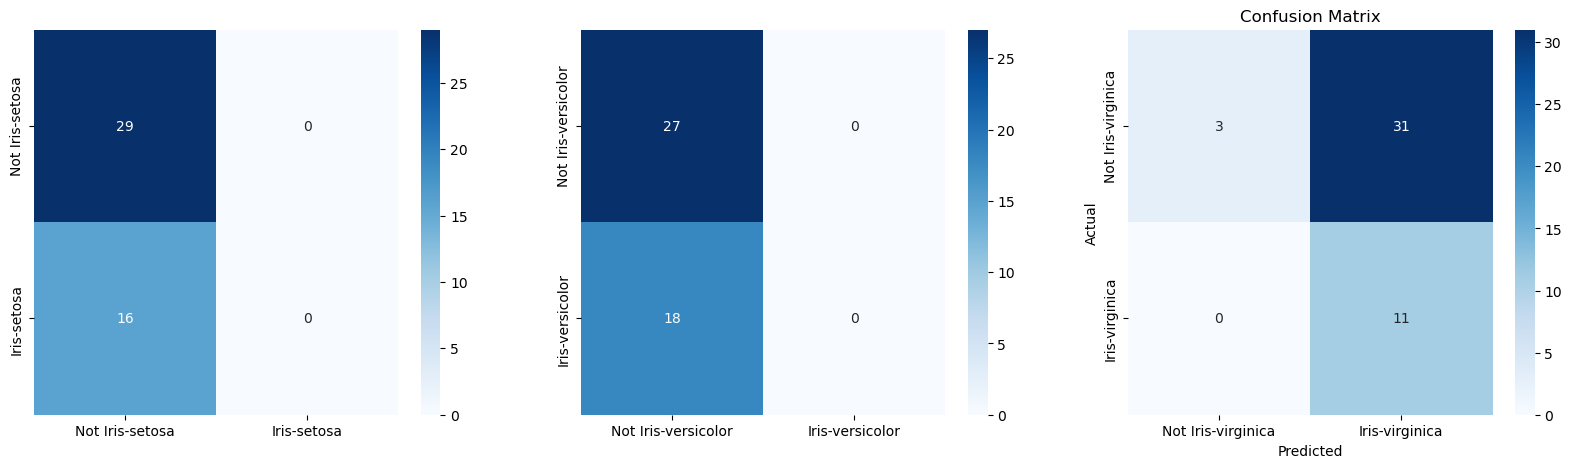

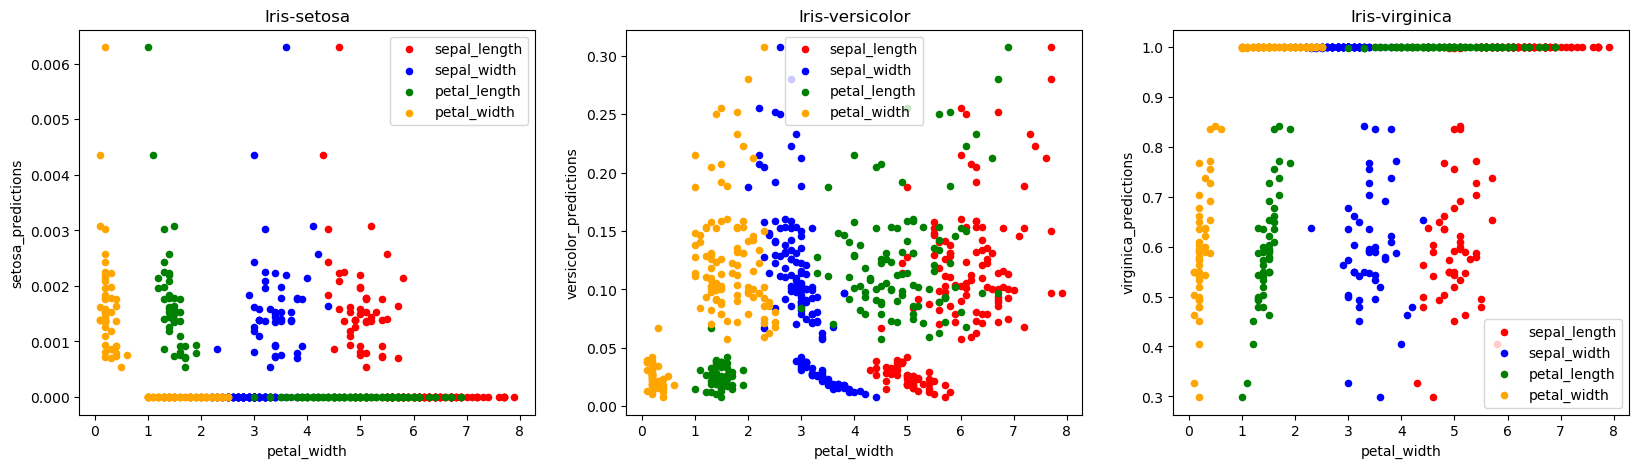

In [50]:
# Show the confusion matrix for each species
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
show_confusion_matrix('Iris-setosa', setosa_y_test, setosa_classifier.predict(setosa_x_test), ax=ax[0])
show_confusion_matrix('Iris-versicolor', versicolor_y_test, versicolor_classifier.predict(versicolor_x_test), ax=ax[1])
show_confusion_matrix('Iris-virginica', virginica_y_test, virginica_classifier.predict(virginica_x_test), ax=ax[2])

# Show the predictions line graph for each species
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
setosa_df['setosa_predictions'] = setosa_classifier.predict_proba(setosa_x)[:, 1]
versicolor_df['versicolor_predictions'] = versicolor_classifier.predict_proba(versicolor_x)[:, 1]

virginica_df['virginica_predictions'] = virginica_classifier.predict_proba(virginica_x)[:, 1]

'''
    Show the predictions graph for each species with their respective features:
    - sepal_length
    - sepal_width
    - petal_length
    - petal_width
'''

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
columns_color_mapping = {
    'sepal_length': 'red',
    'sepal_width': 'blue',
    'petal_length': 'green',
    'petal_width': 'orange'
}

for column in columns:
    setosa_df.plot(x=column, y='setosa_predictions', kind='scatter', ax=ax[0], title='Iris-setosa', color=columns_color_mapping[column])
    # Make sure to add legends to per feature
    ax[0].legend(columns)
    versicolor_df.plot(x=column, y='versicolor_predictions', kind='scatter', ax=ax[1], title='Iris-versicolor', color=columns_color_mapping[column])
    ax[1].legend(columns)
    virginica_df.plot(x=column, y='virginica_predictions', kind='scatter', ax=ax[2], title='Iris-virginica', color=columns_color_mapping[column])
    ax[2].legend(columns)

In [39]:
# Get the min max value of a column
def get_min_max(column:str) -> tuple[float, float]:
    return (df[column].min(), df[column].max())

In [40]:
# UI 
import ipywidgets as widgets
from IPython.display import display, clear_output

# Input Dictionary
input_dict: dict[str, float] = {
    'sepal_length': 0,
    'sepal_width': 0,
    'petal_length': 0,
    'petal_width': 0,
}

prediction_mapping = {
    0: 'SETOSA',
    1: 'VERSICOLOR',
    2: 'VIRGINICA',
}

# Title
title = widgets.HTML("<center><h1>Machine Learning Activity 3 - Part 1</h1></center>")


def container():
    return widgets.GridBox(
        [form(), 
         results_table()
        ],
        layout=widgets.Layout(grid_template_columns="repeat(2, 1fr)")
    )

def on_submit_clicked(b):
    clear_output()
    display(title, container())


def submit_button():
    button = widgets.Button(
        description='Submit',
        button_style='success',
        tooltip='Submit',
        icon='check',
        layout=widgets.Layout(width='100%')
    )

    button.on_click(on_submit_clicked)
    return button

def results_table() -> widgets.VBox:
    sepal_length = input_dict['sepal_length']
    sepal_width = input_dict['sepal_width']
    petal_length = input_dict['petal_length']
    petal_width = input_dict['petal_width']
    
    input_values = [sepal_length, sepal_width, petal_length, petal_width]
    
    setosa_preds, _ = predict_data(setosa_classifier, input_values)
    versicolor_preds, _ = predict_data(versicolor_classifier, input_values)
    virginica_preds, _ = predict_data(virginica_classifier, input_values)

    # Create the result
    results = []

    if setosa_preds[0] == 1:
        results.append('SETOSA')
    if versicolor_preds[0] == 1:
        results.append('VERSICOLOR')
    if virginica_preds[0] == 1:
        results.append('VIRGINICA')

    results_str = ', '.join(results)

    
    return widgets.VBox([
    widgets.HTML(value= "<b>Iris Species</b>"),
    # Header
    widgets.GridBox(
        [
            widgets.Label(value='SETOSA'),
            widgets.Label(value='VERSICOLOR'),
            widgets.Label(value="VIRGINICA"),
        ],
        layout=widgets.Layout(grid_template_columns="repeat(3, 1fr)")
    ),

    # Body
    widgets.GridBox(
        [
            widgets.Label(value=f'{setosa_preds[0] == 1}'),
            widgets.Label(value=f'{versicolor_preds[0] == 1}'),
            widgets.Label(value=f'{virginica_preds[0] == 1}'),
        ],
        layout=widgets.Layout(grid_template_columns="repeat(3, 1fr)")
    ),
    
    widgets.HTML(value="<hr>"),
    widgets.HTML(value= f"<h2>The species is <u>{results_str}</u></h2>"),
])


def on_input_changed(change):
    owner = cast(widgets.FloatText, change['owner'])
    input_type = cast(str, owner.description)
    input_dict[input_type] = float(str(owner.value))
    

def build_input(label: str, input_name:str, input_value: float, min: float, max: float) -> widgets.VBox:
    input = widgets.BoundedFloatText(
        # This will be used to identify the input in the `on_input_changed` function
        description=input_name,
        value=input_value,
        continuous_update=True,
        min=min,
        max=max,
        step=0.01,
        )

    input.observe(on_input_changed, names='value')

    return widgets.VBox([
        widgets.Label(value=label, layout=widgets.Layout(width='200px', font_weight='bold')),
        input,
    ])


def form():
    sepal_length_min, sepal_length_max = get_min_max('sepal_length')
    sepal_width_min, sepal_width_max = get_min_max('sepal_width')
    petal_length_min, petal_length_max = get_min_max('petal_length')
    petal_width_min, petal_width_max = get_min_max('petal_width')


    sepal_length_container = build_input('Sepal Length:', 
                                         'sepal_length', 
                                         input_dict['sepal_length'],
                                         min=sepal_length_min,
                                         max=sepal_length_max)
    
    sepal_width_container = build_input('Sepal Width:', 
                                        'sepal_width', 
                                        input_dict['sepal_width'],
                                        min=sepal_width_min,
                                        max=sepal_width_max)
    
    petal_length_container = build_input('Petal Length:', 
                                         'petal_length', 
                                         input_dict['petal_length'],
                                         min=petal_length_min,
                                         max=petal_length_max)
    
    petal_width_container = build_input('Petal Width:', 
                                        'petal_width', 
                                        input_dict['petal_width'],
                                        min=petal_width_min,
                                        max=petal_width_max)

    return widgets.VBox([
    sepal_length_container,
    sepal_width_container,
    petal_length_container,
    petal_width_container,
    widgets.HTML(value="<hr>"),
    submit_button()
    
])

display(title, container())

HTML(value='<center><h1>Machine Learning Activity 3 - Part 1</h1></center>')

GridBox(children=(VBox(children=(VBox(children=(Label(value='Sepal Length:', layout=Layout(width='200px')), Bo…

#### Discussions and Reflection

1. How accurate is each model?
   - Based on the confusion matrix of ```[[19  0  0]
 [ 0 14  1]
 [ 0  0 11]]```, we can say that the model is accurate in classifying the iris data set.

1. Is logistic regression a good use case for classifying the iris data set? Elucidate your answer.
   - Yes, because the data is linearly separable.

2. What are your recommendations for improving the classification of this data det? Explain.
   - I think the data is already good for classification.
   
3. Create a graphical model of how the selection of logistic regression works.
  